In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
%matplotlib inline


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
#from livelossplot import PlotLossesTensorFlowKeras()
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.8.0


In [ ]:
base_dir = '/tmp'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

In [ ]:
img_size = 64
batch_size = 64
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (img_size, img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = valid_datagen.flow_from_directory(test_dir,
                                                    target_size = (img_size, img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1343 images belonging to 4 classes.
Found 150 images belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(64,64,1)))
model.add(Flatten())
model.add(Dense(2048, input_dim=8, activation='relu'))
model.add(Dense(1024, input_dim=8, activation='relu'))
model.add(Dense(1024, input_dim=8, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
opt = Adam(lr=0.0005)

model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        640       
                                                                 
 flatten_2 (Flatten)         (None, 262144)            0         
                                                                 
 dense_9 (Dense)             (None, 2048)              536872960 
                                                                 
 dense_10 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_11 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_12 (Dense)            (None, 128)               131200    
                                                                 
 dense_13 (Dense)            (None, 4)                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint('model_weights.h5',monitor='val_accuracy',
                            save_weights_only=True,mode='max',verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,mode='auto')
callbacks = [checkpoint, reduce_lr]

history = model.fit(x=train_generator,
                   steps_per_epoch=steps_per_epoch,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=validation_steps,
                   callbacks = callbacks )

Epoch 1/15
20/20 [==============================] - ETA: 0s - loss: 7.1101 - accuracy: 0.4109
Epoch 1: saving model to model_weights.h5
20/20 [==============================] - 147s 7s/step - loss: 7.1101 - accuracy: 0.4109 - val_loss: 2.2769 - val_accuracy: 0.3906 - lr: 5.0000e-04
Epoch 2/15
20/20 [==============================] - ETA: 0s - loss: 1.2544 - accuracy: 0.4683
Epoch 2: saving model to model_weights.h5
20/20 [==============================] - 149s 7s/step - loss: 1.2544 - accuracy: 0.4683 - val_loss: 1.3257 - val_accuracy: 0.3906 - lr: 5.0000e-04
Epoch 3/15
20/20 [==============================] - ETA: 0s - loss: 1.0027 - accuracy: 0.4683
Epoch 3: saving model to model_weights.h5
20/20 [==============================] - 143s 7s/step - loss: 1.0027 - accuracy: 0.4683 - val_loss: 1.2200 - val_accuracy: 0.3906 - lr: 5.0000e-04
Epoch 4/15
20/20 [==============================] - ETA: 0s - loss: 0.9900 - accuracy: 0.5035
Epoch 4: saving model to model_weights.h5
20/20 [========

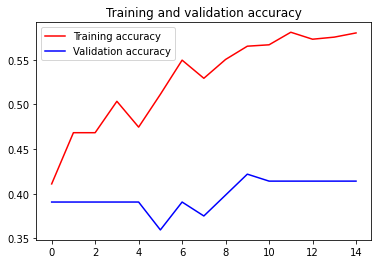

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


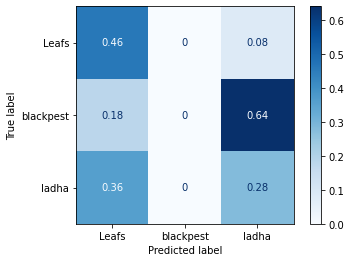

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
labels = ["Leafs", "blackpest", "ladha"]

cm = confusion_matrix(validation_generator.classes, y_pred, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print("Training set accuracy :", end = " ")

print(history.history['accuracy'][-1])

print("Test data  accuracy:", end = " ")

print(history.history['val_accuracy'][-1])

Training set accuracy : 0.5801407098770142
Test data  accuracy: 0.4140625


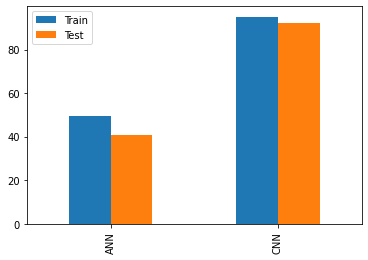

In [ ]:
import pandas as pd
groups = [[58, 41], [98,92]]
group_labels = ['ANN', 'CNN']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [df.mean().rename('Train'), df.min().rename('Test')],
    axis=1).plot.bar()

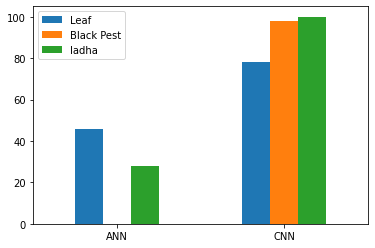

In [ ]:
leaf = [46,78]
bp = [0,98]
ladha = [28,100]
index = ['ANN','CNN']
df = pd.DataFrame({'Leaf': leaf,'Black Pest':bp,
                   'ladha': ladha}, index=index)
ax = df.plot.bar(rot=0)